# Analysis of Movie Data

## Table of Contents

- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
- 2. [Importing the packages](#section2)</br>
- 3. [Load the packages and data](#section3)</br>
    - 3.1. [Data source and dataset](#section301)</br>
- 4. [Data profiling](#section4)</br>
    - 4.1. [Pandas Profiling before Data Preprocessing](section401)</br>
    - 4.2 [Observations from Pandas Profiling before Data Processing](section402)</br>
- 5. [Data Processing](#section5)</br>
    - 5.1 [Dropping unused columns](#section501)</br>
    - 5.2 [Dropping rows with null values for Revenue](#section502)</br>
    - 5.3 [Replace NAN values of Metascore with the mean Metascore value](#section503)</br>
    - 5.4 [Data profiling after the data processing](#section504)</br>
- 6. [Exploratory Data Analysis](#section6)</br>
    - 6.1 [which combination of Genre moveis are made more? Listing top 10](#section602)</br>
    - 6.2 [which Individual Genre moveis are made more? Listing top 10](#section602)</br>
    - 6.3 [which Individual Genre moveis are least made? ](#section603)
    - 6.4 [Which Individual Genre moveis are made more in each year ?](#section604)
    - 6.5 [Which Genre Movie has made more money in total](#section605)
    - 6.6 [Which Genre Movie has made more money on an average](#section606)
    - 6.7 [Which Genre Movie has made more money in each year on an average?](#section607)
    - 6.8 [Which Genre Movie has Better votes on an average?](#section608)
    - 6.9 [Which Genre Movie has Better Rating on an average?](#section609)
    - 6.10 [Which Genre Movie has Better Metascore on an average?](#section610)
    - 6.11 [Which Genre movie has more run time average?](#section611)
    - 6.12 [Which director has made more money in each Genre?](#section612)
- 7. [Individual field analysis](#section7)
    - 7.1 [Which are the top 10 movies in last 10 years to have made the most money?](#section701)
    - 7.2 [How many movies are made in each year?](#section702)
- 8. [Analysing relationships between the columns](#section8)
    - 8.1 [How are each Genres performing in terms of revenue?](#section801)
    - 8.2 [Which year has more successful movies in terms of revenue?](#section802)
    - 8.3 [What is the relation between Revenue and Rating?](#section803)
    - 8.4 [What is the relation between Revenue and Metascore?](#section804)
    - 8.5 [What is the relation between Revenue and Rating?](#section805)

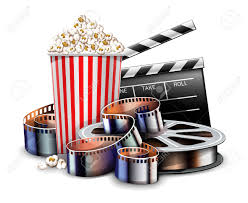
 
<a id=section1></a> 
## 1. Problem Statement 

This is a movie data set from the INSAID [Git hub page](https://github.com/insaid2018/Term-1/tree/master/Data/Projects/1000%20movies%20data.csv). It captures the movie information like Genres, year, revenue, rating, metascore and Votes. The effort is to __analyse the movies and find the recipe for successful Movies. And answer questions like Who, how and when the successful movies are made? __

<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 



<a id=section2></a> 
## 2. Importing the packages



In [9]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore') 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [11]:
#Install packages if not installed already

!pip install plotly --upgrade
!pip install chart-studio
!pip install pandas --upgrade

Requirement already up-to-date: plotly in /anaconda3/lib/python3.7/site-packages (4.4.1)
Requirement already up-to-date: pandas in /anaconda3/lib/python3.7/site-packages (0.25.3)


In [12]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

- Make sure panda version is '0.25.x'. Some of the functions used in this code will not work with panda version below '0.25.x'. Eg: explode() function.

In [13]:
pd.__version__

'0.25.3'

<a id=section3></a> 
## 3. Load the data 

In [14]:
# Importing the 1st dataset (Nutrition Facts for McDonald's Menu dataset).

df_movie = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
df_movie.head()

Rank                    Title                     Genre  \
0  1     Guardians of the Galaxy  Action,Adventure,Sci-Fi    
1  2     Prometheus               Adventure,Mystery,Sci-Fi   
2  3     Split                    Horror,Thriller            
3  4     Sing                     Animation,Comedy,Family    
4  5     Suicide Squad            Action,Adventure,Fantasy   

                                                                                                                                                                                                                      Description  \
0  A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.                                                                                                  
1  Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.                                                                                                  
2  Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.                                                                    
3  In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.   
4  A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.                                              

               Director  \
0  James Gunn             
1  Ridley Scott           
2  M. Night Shyamalan     
3  Christophe Lourdelet   
4  David Ayer             

                                                                       Actors  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                         
1  Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron      
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula             
3  Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson   
4  Will Smith, Jared Leto, Margot Robbie, Viola Davis                           

   Year  Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0  2014  121                8.1     757074  333.13              76.0       
1  2012  124                7.0     485820  126.46              65.0       
2  2016  117                7.3     157606  138.12              62.0       
3  2016  108                7.2     60545   270.32              59.0       
4  2016  123                6.2     393727  325.02              40.0

<a id=section31></a> 
### 3.1. Data source and dataset
This is a data set of 1,000 most popular movies on IMDB in the last 10 years. The data fields included are:
- __Rank__: Movie rank order
- __Title__: The title of the film
- __Genre__: A comma-separated list of genres used to classify the film
- __Description__ : Brief one-sentence movie summary
- __Director__ : The name of the film's director
- __Actors__: A comma-separated list of the main stars of the film
- __Year__ : The year that the film released as an integer.
- __Runtime (Minutes)__ : The duration of the film in minutes.
- __Rating__: User rating for the movie 0-10
- __Votes__: Number of votes
- __Revenue (Millions)__: Movie revenue in millions
- __Metascore__: An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.

In [15]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


info()function gives us the following insights into the df_movie dataframe:
- There are a total of 1000 samples (rows) and 12 columns in the dataframe.
- There are 7 columns with a numeric datatype and 5 columns with an object datatype.
- There are 64 missing Metascores and 128 missing Revenue values in the data.

In [16]:
df_movie.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000  1000.000000        1000.000000  1.000000e+03   
mean   500.500000   2012.783000  113.172000         6.723200     1.698083e+05   
std    288.819436   3.205962     18.810908          0.945429     1.887626e+05   
min    1.000000     2006.000000  66.000000          1.900000     6.100000e+01   
25%    250.750000   2010.000000  100.000000         6.200000     3.630900e+04   
50%    500.500000   2014.000000  111.000000         6.800000     1.107990e+05   
75%    750.250000   2016.000000  123.000000         7.400000     2.399098e+05   
max    1000.000000  2016.000000  191.000000         9.000000     1.791916e+06   

       Revenue (Millions)   Metascore  
count  872.000000          936.000000  
mean   82.956376           58.985043   
std    103.253540          17.194757   
min    0.000000            11.000000   
25%    13.270000           47.000000   
50%    47.985000           59.500000   
75%    113.715000          72.000000   
max    936.630000          100.000000

- ```describe``` function gives us the following insights into the data:
  
  - **Runtime(Minutes)** column is having an almost **normal distribution** because the **mean (113.172000)** value is close to the **median (111.000000)** value. Also, Metascore also has a normal distribution of 58 as mean and 59.5 as 50%. 

  - The distribution of **Revenue (Millions)** is **positive (right) skewed** because the **mean** of **Revenue (Millions) (82.956376)** lies to the **right** of the **median(50%)** value **(47.985)**, on a **distribution plot**. 
  
  - Max value of 936.63 Million  **Revenue (Millions)** is an outlier as it lies far away from the mean.


<a id=section4></a>
## 4. Data Profiling
Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section401></a>
### 4.1 Pandas Profiling before Data Preprocessing
- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __movie_profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 


In [ ]:
!pip install pandas-profiling

In [23]:
import pandas_profiling
df_movie.profile_report(style={'full_width':True},title="Movie Profiling before Data Preprocessing")

In [ ]:
profile = df_movie.profile_report(style={'full_width':True},title="Movie Profiling before Data Preprocessing")
profile.to_file(output_file="movie_profiling_before_preprocessing.html")

<a id=section402></a>
### 4.2 Observations from Pandas Profiling before Data Processing <br><br>

__Dataset info__:
- Number of variables: 12
- Number of observations: 1000
- Missing cells: 192 (1.6%)


__Variables types__: 
- Numeric = 7
- Categorical = 4
- Text (Unique) = 1

<br>

- **Title** has unique values **Title of the movie**.
- **Metascore** and **Revenue** has **64(6.4%) and 128(12.8%) missing values** respectively
- **Actors** and **Directors** have high **cordinality**
- **Revenue** and **Votes** are positevely skewed with many outliers.
- Maximum value of **936.63** of Revenue is an outlier.
- There is a co-relation between **Metascore and Rating** and **Revenue and Votes**


<a id=section5></a>
## 5 Data Processing 
we will perform Data Preprocessing on our dataset, to make the data usable for EDA.

In [24]:
df_movie.head()

Rank                    Title                     Genre  \
0  1     Guardians of the Galaxy  Action,Adventure,Sci-Fi    
1  2     Prometheus               Adventure,Mystery,Sci-Fi   
2  3     Split                    Horror,Thriller            
3  4     Sing                     Animation,Comedy,Family    
4  5     Suicide Squad            Action,Adventure,Fantasy   

                                                                                                                                                                                                                      Description  \
0  A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.                                                                                                  
1  Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.                                                                                                  
2  Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.                                                                    
3  In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.   
4  A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.                                              

               Director  \
0  James Gunn             
1  Ridley Scott           
2  M. Night Shyamalan     
3  Christophe Lourdelet   
4  David Ayer             

                                                                       Actors  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                         
1  Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron      
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula             
3  Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson   
4  Will Smith, Jared Leto, Margot Robbie, Viola Davis                           

   Year  Runtime_(Minutes)  Rating   Votes  Revenue_(Millions)  Metascore  
0  2014  121                8.1     757074  333.13              76.0       
1  2012  124                7.0     485820  126.46              65.0       
2  2016  117                7.3     157606  138.12              62.0       
3  2016  108                7.2     60545   270.32              59.0       
4  2016  123                6.2     393727  325.02              40.0

<a id=section501></a>
### 5.1 Dropping unused columns

Dropping Description, Rank and Actors. Description is not used in our analysis, Ranking is same as index and Actors are highly cordinal and will not be used in the current analysis

In [25]:
df_movie.drop(['Description','Rank','Actors'], axis=1, inplace=True)
df_movie.set_index('Title')
df_movie.head()

Title                     Genre              Director  \
0  Guardians of the Galaxy  Action,Adventure,Sci-Fi   James Gunn             
1  Prometheus               Adventure,Mystery,Sci-Fi  Ridley Scott           
2  Split                    Horror,Thriller           M. Night Shyamalan     
3  Sing                     Animation,Comedy,Family   Christophe Lourdelet   
4  Suicide Squad            Action,Adventure,Fantasy  David Ayer             

   Year  Runtime_(Minutes)  Rating   Votes  Revenue_(Millions)  Metascore  
0  2014  121                8.1     757074  333.13              76.0       
1  2012  124                7.0     485820  126.46              65.0       
2  2016  117                7.3     157606  138.12              62.0       
3  2016  108                7.2     60545   270.32              59.0       
4  2016  123                6.2     393727  325.02              40.0

In [26]:
df_movie['Genre'].value_counts()[:10]

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

<a id=section502></a>
### 5.2 Dropping rows with null values for Revenue
Since revenue is used in our analysis, rows with null values can not be used. So dropping them.

In [27]:
# Drop movies which have revenue column empty.
df_movie.drop(df_movie[df_movie['Revenue_(Millions)'].isnull()].index, inplace=True)

In [28]:
df_movie.isnull().sum()

Title                 0 
Genre                 0 
Director              0 
Year                  0 
Runtime_(Minutes)     0 
Rating                0 
Votes                 0 
Revenue_(Millions)    0 
Metascore             34
dtype: int64

<a id=section503></a>
### 5.3 Replace NAN values of Metascore with the mean Metascore value
Replacing NAN values in Metascores with the mean value

In [29]:
#List the movies which have Metascore value as null
print(df_movie[df_movie['Metascore'].isnull()])



                         Title                       Genre  \
26   Bahubali: The Beginning    Action,Adventure,Drama       
27   Dead Awake                 Horror,Thriller              
117  Dangal                     Action,Biography,Drama       
402  Bronson                    Action,Biography,Crime       
417  Atonement                  Drama,Mystery,Romance        
429  The Purge: Election Year   Action,Horror,Sci-Fi         
435  Filth                      Comedy,Crime,Drama           
445  Silent Hill                Adventure,Horror,Mystery     
484  Angry Birds                Animation,Action,Adventure   
543  P.S. I Love You            Drama,Romance                
634  WALL·E                     Animation,Adventure,Family   
645  Gran Torino                Drama                        
648  Sleeping Beauty            Drama,Romance                
692  Genius                     Biography,Drama              
696  10 Years                   Comedy,Drama,Romance         
700  Fun

In [30]:
#Find out the mean metascore
df_movie['Metascore'].value_counts()
df_movie[~(df_movie['Metascore'].isnull())]['Metascore'].median()

60.0

In [31]:
#Fill mean 'Metascore' in the Metascore columns where there is NAN
df_movie.fillna(df_movie.median(), inplace=True)

In [32]:
#Check 3 recordw which had Metascore as NAN
print(df_movie.loc[[26,27,117]])

                       Title                   Genre        Director  Year  \
26   Bahubali: The Beginning  Action,Adventure,Drama  S.S. Rajamouli  2015   
27   Dead Awake               Horror,Thriller         Phillip Guzman  2016   
117  Dangal                   Action,Biography,Drama  Nitesh Tiwari   2016   

     Runtime_(Minutes)  Rating  Votes  Revenue_(Millions)  Metascore  
26   159                8.3     76193  6.50                60.0       
27   99                 4.7     523    0.01                60.0       
117  161                8.8     48969  11.15               60.0       


<a id=section504></a>
### 5.4 Data profiling after the data processing
Do a data profiling to see how the data looks now

In [34]:
# df_movie.profile_report(style={'full_width':True})
df_movie.profile_report(style={'full_width':True},title="Movie Profiling after Data Preprocessing")

In [ ]:
profile = df_movie.profile_report(style={'full_width':True},title="Movie Profiling after Data Preprocessing")
profile.to_file(output_file="movie_profiling_after_preprocessing.html")

In [ ]:
Observations from Pandas Profiling before Data Processing

Dataset info:

Number of variables: 10
Number of observations: 872
Missing cells: 0 (0.0%)

Variables types:

Numeric = 7
Categorical = 3

<a id=section6></a>
## 6. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 

<a id=section601></a>
### 6.1 which combination of Genre moveis are made more? Listing top 10

Text(0.5, 1.0, 'Pie chart showing the proportion of top 10 Genre combinations')

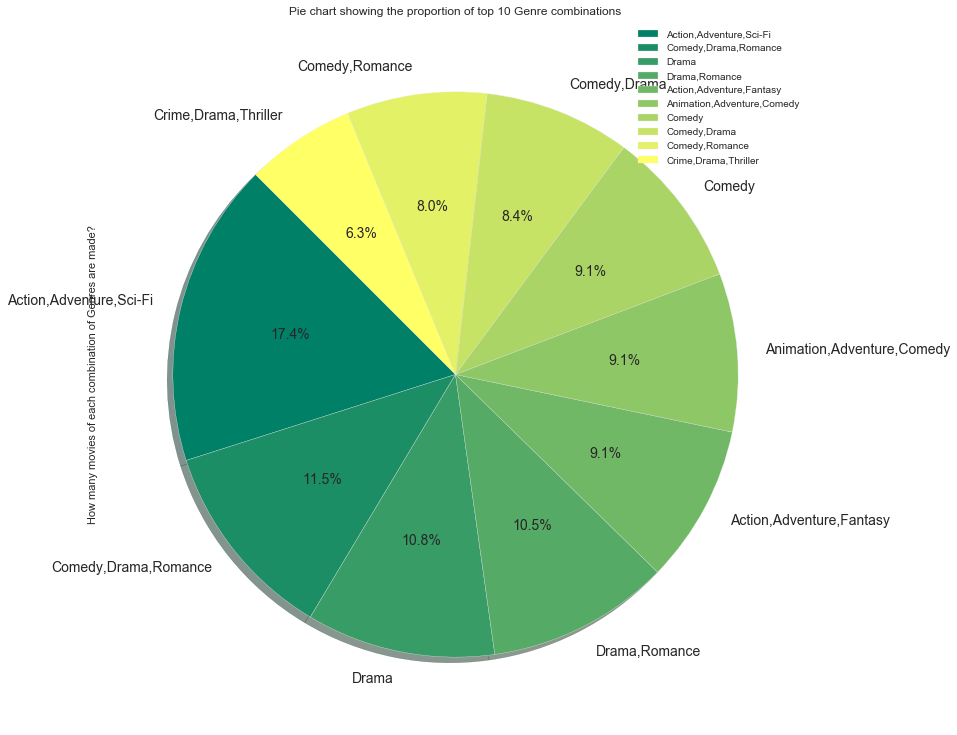

In [62]:
df_movie['Genre'].value_counts()[:10].plot(kind='pie',  fontsize=14, autopct='%3.1f%%', 
                                               figsize=(13,13), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('How many movies of each combination of Genres are made?')
plt.title('Pie chart showing the proportion of top 10 Genre combinations')

When we consider the combination of Genres, the top 3 Genres in which movies are made are:
1. Action, Adventure, Sci-Fi (17.4%)
2. Comedy, Drama, Romance (11.5%)
3. Drama (10.8%)

In [36]:
# Which Genre combinations are the least made info movies
df_movie['Genre'].value_counts().tail(3)

Drama,Horror,Musical      1
Drama,Family,Music        1
Drama,Fantasy,Thriller    1
Name: Genre, dtype: int64

The least number of movies are made in the Genre combination category:
1. Drama,Horror,Musical      1
2. Drama,Family,Music        1
3. Drama,Fantasy,Thriller

<a id=section602></a>
### 6.2 which Individual Genre moveis are made more? Listing top 10
Most of the movies belong to multiple Genres. When we separate them to analyse how individual Genres fare it reveals many things about the Genres. Here explode() function is used to separate the Genre combinations. 

In [37]:
#which Individual Genre movies are made more?
#Here separating the Genre combinations and analysing the Genres
df_movie_genres = df_movie.copy()
df_movie_genres['Genre'] = df_movie_genres['Genre'].str.split(',')
df_movie_genres = df_movie_genres.explode('Genre')

df_movie_genres['Genre'].value_counts()

Drama        440
Action       286
Comedy       255
Adventure    252
Thriller     153
Crime        130
Romance      129
Sci-Fi       110
Horror       93 
Fantasy      93 
Mystery      89 
Biography    75 
Family       49 
Animation    47 
History      26 
Sport        16 
Music        15 
War          10 
Western      5  
Musical      5  
Name: Genre, dtype: int64

After exploding we see that there are only 20 categories. Music and Musical looks similar. But for now we will keep it that way.

Text(0.5, 1.0, 'Pie chart showing the proportion of top 10 Individual Genres')

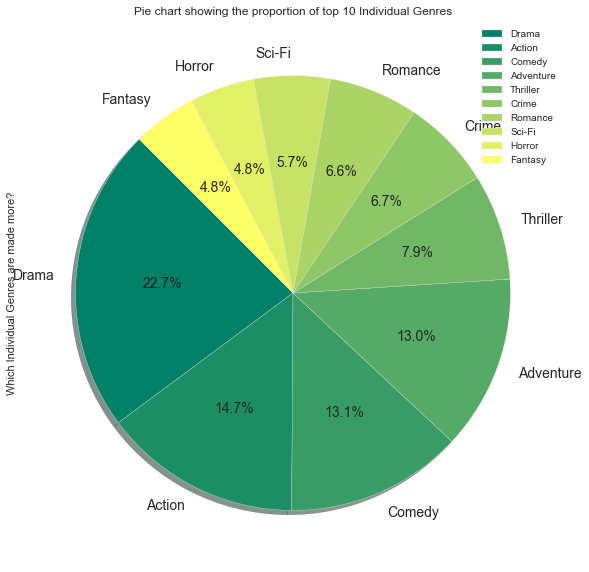

In [63]:
df_movie_genres['Genre'].value_counts()[:10].plot(kind='pie',  fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Which Individual Genres are made more?')
plt.title('Pie chart showing the proportion of top 10 Individual Genres')

When we consider the combination of Genres, the top 3 Genres in which maximum movies are made are:
1. Drama (22.7%)
2. Action (14.7%)
3. Comedy (13.1%)

<a id=section603></a>
### 6.3 which Individual Genre moveis are least made?

In [39]:
#Which movie Genres are least made
df_movie_genres['Genre'].value_counts().tail(3)

War        10
Western    5 
Musical    5 
Name: Genre, dtype: int64

<a id=section604></a>
### 6.4 Which Individual Genre moveis are made more in each year ?

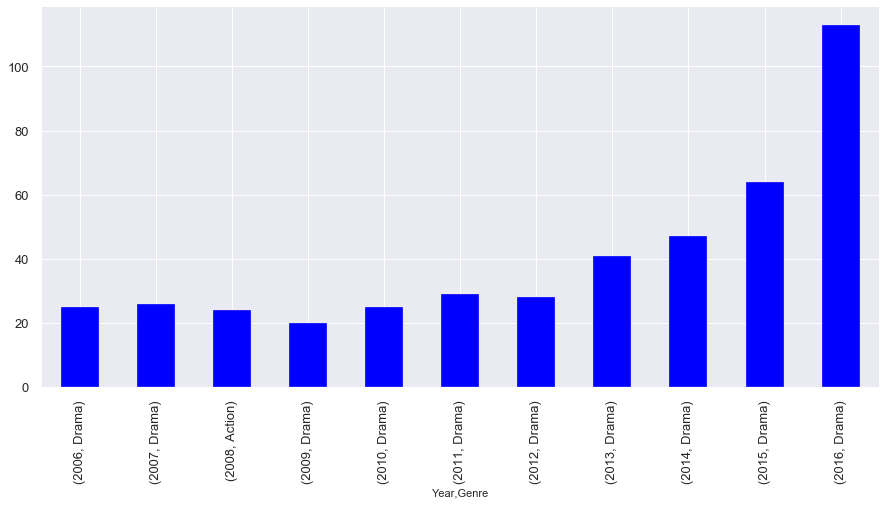

In [41]:
s = df_movie_genres['Genre'].groupby(df_movie['Year']).value_counts()
s.groupby(level=0).nlargest(1).reset_index(level=0, drop=True).plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='blue')

It's Drama which is made the most in each year. <br><br>

<a id=section605></a>
### 6.5 Which Genre Movie has made more money in total?

Movies of Genre, Drama, are made more in each year. But are they the most revenue generating movies? This data has some repetition as we have exploded the dataframe to get individual genre. But it will give some idea on how some and average revenue of each Genre.


Text(0, 0.5, 'Top total revenue generating Genres(in million INR)')

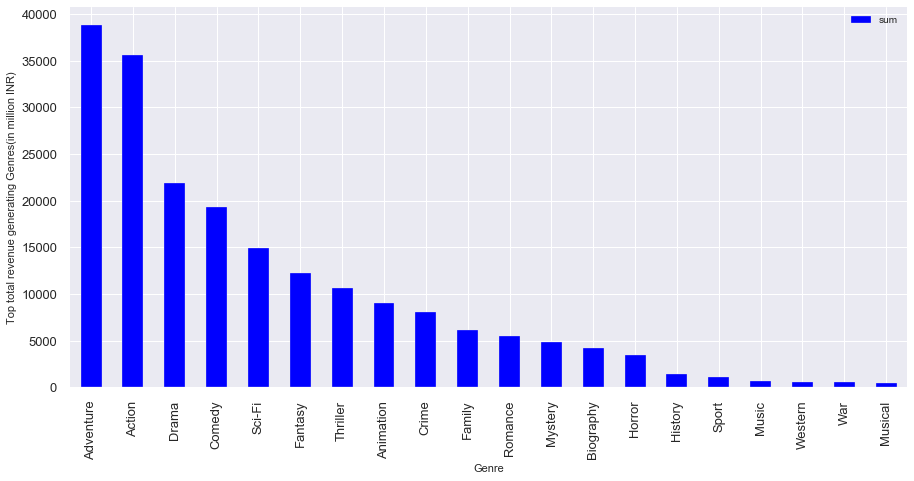

In [42]:
#Which Genre Movie has made more money in total

df_movie_genres.groupby('Genre')['Revenue_(Millions)'].agg(['sum']).sort_values('sum',ascending=False).plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='blue')
plt.ylabel('Top total revenue generating Genres(in million INR)')

The Genres Adventure, Action and Dramas have made the most revenue in the movie industry <br><br>

<a id=section606></a>
### 6.6 Which Genre Movie has made more money on an average?

When we take mean of the revenues of each Genre movies we will know which Genre movies are more profitable to make.

Text(0, 0.5, 'Total Cost Price (in million INR)')

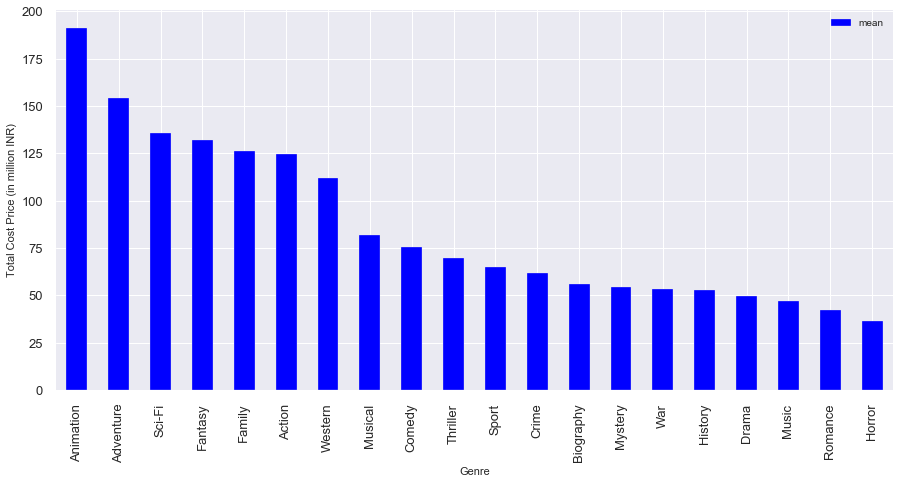

In [43]:
df_movie_genres.groupby('Genre')['Revenue_(Millions)'].agg(['mean']).sort_values('mean',ascending=False).plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='blue')
plt.ylabel('Total Cost Price (in million INR)')

Though Adventure, Action and Drama has made more total revenue because of their numbers, Animation movies make the most revenue when we look at the mean revenue of each Genre <br><br>


<a id=section607></a>
### 6.7 Which Genre Movie has made more money in each year on an average?

When we take mean of the revenues of each Genre movies we will know which Genre movies are more profitable to make.


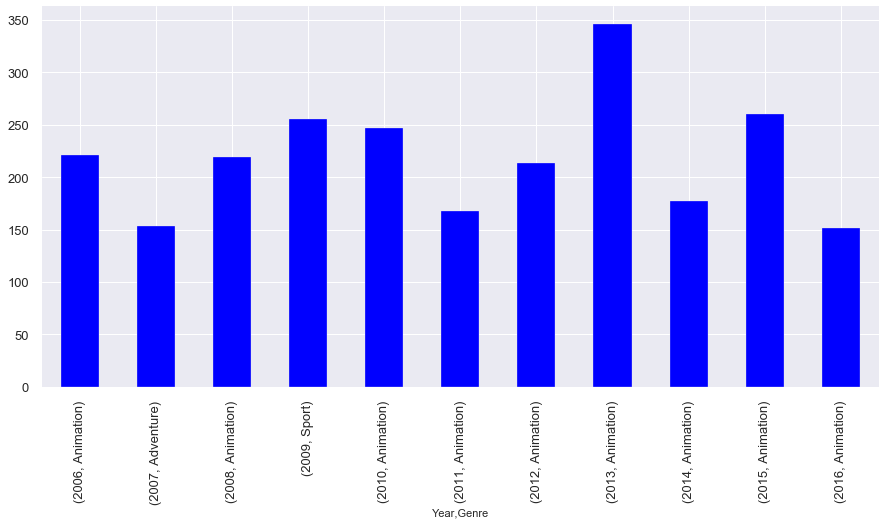

In [44]:
#Which Genre Movie has made more money in each year on an average

s = df_movie_genres.groupby(['Year','Genre'])['Revenue_(Millions)'].agg('mean')

s.groupby(level=0).nlargest(1).reset_index(level=0, drop=True).plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='blue')

Even when we see year wise revenue generation, Animation tops on most of the years.<br><br>

<a id=section608></a>
### 6.8 Which Genre Movie has Better votes on an average?

When we take mean of the votes of each Genre movies we will know which Genre movies are more getting more votes

Text(0, 0.5, 'Votes of movies based on Genre')

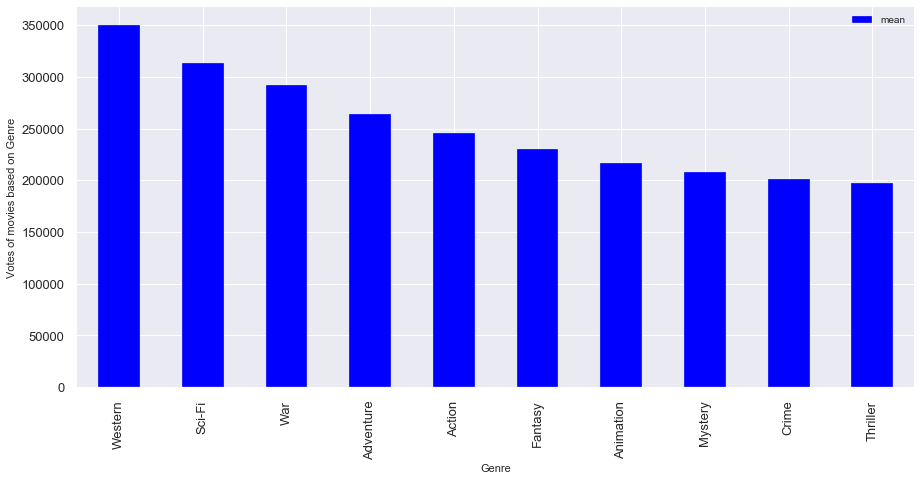

In [64]:
#Which Genre Movie has Better votes on an average

df_movie_genres.groupby('Genre')['Votes'].agg(['mean']).sort_values('mean',ascending=False)[:10].plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='blue')
plt.ylabel('Votes of movies based on Genre')

By looking at the Votes, it's Western Genre movies which get vote. The maximum revenue generating Genre, Animation comes distant 7th. The reason could be because the more spectators of Animation movies are kids and they don't understand the voting system <br><br>

<a id=section609></a>
### 6.9 Which Genre Movie has Better Rating on an average?

When we take mean of the rating of each Genre movies we will know which Genre movies are getting more rating on an average.

Text(0, 0.5, 'Metascore of movies based on Genre')

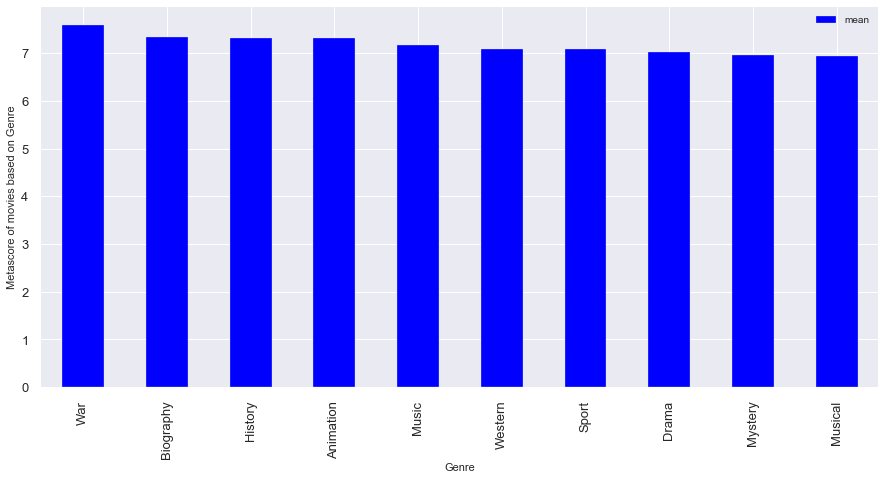

In [46]:
#Which Genre Movie has Better Rating on an average

df_movie_genres.groupby('Genre')['Rating'].agg(['mean']).sort_values('mean',ascending=False)[:10].plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='blue')
plt.ylabel('Rating of movies based on Genre')

By looking at the bar chart, it is visible that Genre has very less effect on the Rating of the movie. Irrespective of the Genre, if movies are made well, they gate better Rating. <br><br>

<a id=section610></a>
### 6.10 Which Genre Movie has Better Metascore on an average?

When we take mean of the Metascore of each Genre movies we will know which Genre movies are getting more rating on an average.

Text(0, 0.5, 'Metascore of movies based on Genre')

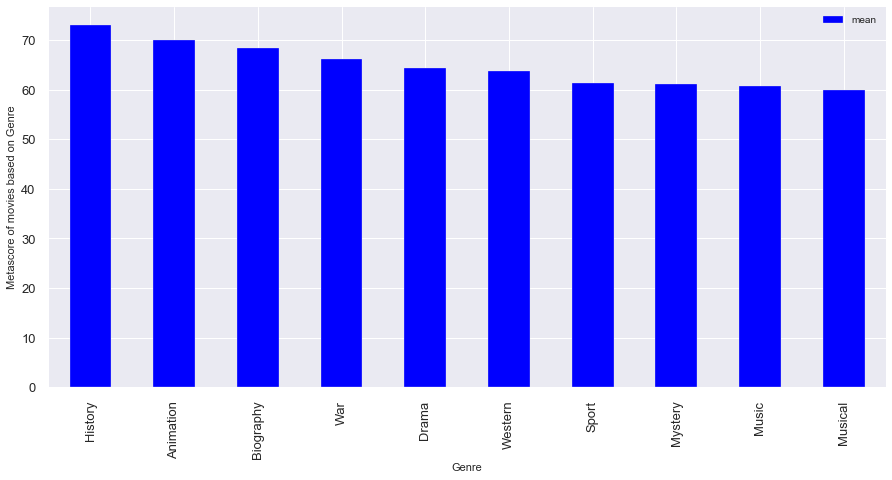

In [47]:
#Which Genre Movie has Better ranking

df_movie_genres.groupby('Genre')['Metascore'].agg(['mean']).sort_values('mean',ascending=False)[:10].plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='blue')
plt.ylabel('Metascore of movies based on Genre')

By looking at the average Metascores of each Genre, it's evident that Genre has very less effect on Metascore. <br><br>


<a id=section611></a>
### 6.11 Which Genre movie has more run time average?

Does Genre has anything to do with the movie run time?

Text(0, 0.5, 'Metascore of movies based on Genre')

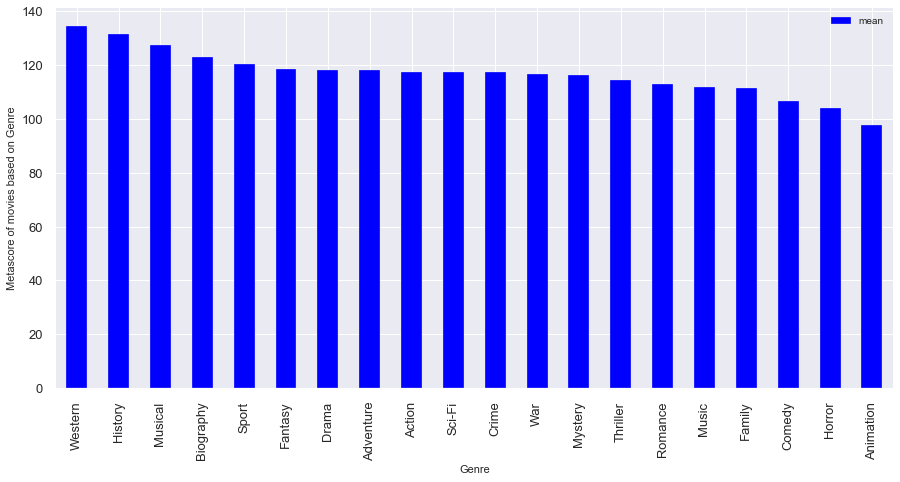

In [48]:
#Which Genre movie has more run time average?

df_movie_genres.groupby('Genre')['Runtime_(Minutes)'].agg(['mean']).sort_values('mean',ascending=False).plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='blue')
plt.ylabel('Metascore of movies based on Genre')

From the Analysis, it looks like Western, History and Musical Genre movies are the longest and Animation movies which are mostly made for kids are shorter. <br>


<a id=section612></a>
### 6.12 Which director has made more money in each Genre?

Who are the more successful directors in terms of revenue generation in each Genre?


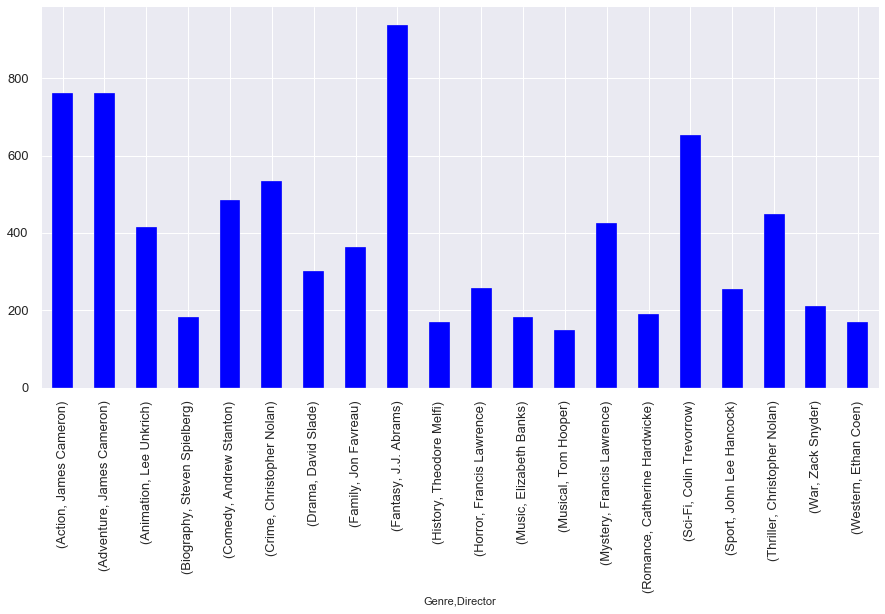

In [49]:
#Which director in each Genre is more revenue generating?

s = df_movie_genres.groupby(['Genre','Director'])['Revenue_(Millions)'].agg('mean')

s.groupby(level=[0]).nlargest(1).reset_index(level=0, drop=True).plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='blue')

These are the most revenue generating directors in each Genre.<br><br>

<a id=section7></a>
## 7. Individual field analysis

<a id=section701></a>
### 7.1 Which are the top 10 movies in last 10 years to have made the most money?

In [50]:
df_movie.sort_values('Revenue_(Millions)', ascending=False).head(10)

Title                       Genre  \
50   Star Wars: Episode VII - The Force Awakens  Action,Adventure,Fantasy     
87   Avatar                                      Action,Adventure,Fantasy     
85   Jurassic World                              Action,Adventure,Sci-Fi      
76   The Avengers                                Action,Sci-Fi                
54   The Dark Knight                             Action,Crime,Drama           
12   Rogue One                                   Action,Adventure,Sci-Fi      
119  Finding Dory                                Animation,Adventure,Comedy   
94   Avengers: Age of Ultron                     Action,Adventure,Sci-Fi      
124  The Dark Knight Rises                       Action,Thriller              
578  The Hunger Games: Catching Fire             Action,Adventure,Mystery     

              Director  Year  Runtime_(Minutes)  Rating    Votes  \
50   J.J. Abrams        2015  136                8.1     661608    
87   James Cameron      2009  162                7.8     935408    
85   Colin Trevorrow    2015  124                7.0     455169    
76   Joss Whedon        2012  143                8.1     1045588   
54   Christopher Nolan  2008  152                9.0     1791916   
12   Gareth Edwards     2016  133                7.9     323118    
119  Andrew Stanton     2016  97                 7.4     157026    
94   Joss Whedon        2015  141                7.4     516895    
124  Christopher Nolan  2012  164                8.5     1222645   
578  Francis Lawrence   2013  146                7.6     525646    

     Revenue_(Millions)  Metascore  
50   936.63              81.0       
87   760.51              83.0       
85   652.18              59.0       
76   623.28              69.0       
54   533.32              82.0       
12   532.17              65.0       
119  486.29              77.0       
94   458.99              66.0       
124  448.13              78.0       
578  424.65              76.0

These are the top 10 movies to have generated the maximum revenue. Star Wars being the an outlier in the revenue generation. Most revenue generating movie is “Star Wars VII - The Force Awakens” where as most successful director is JJ Abrams. No wonder JJ Abrams is the director of the movie, “Star Wars VII- The Force Awakens”
 <br><br>


<a id=section7.2></a>
### 7.2 How many movies are made in each year?


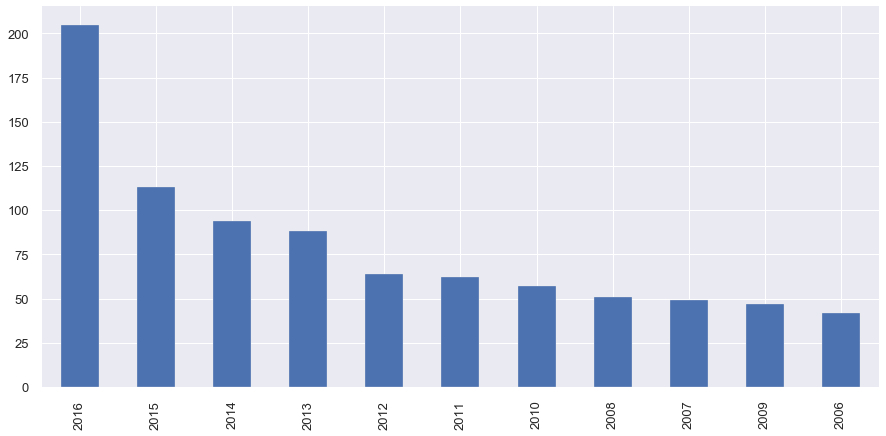

In [52]:
#How many movies are made in each year.
df_movie['Year'].value_counts().plot(kind='bar', figsize=(15,7), fontsize=13)

It's evident from the above graph that over a period of time the number of movies made are increasing. There is not much increase in number of movies in the years 2008 and 2012 could be because of recession experienced in those years.<br><br>

<a id=section8></a>
## 8 Analysing relationships between the columns

<a id=section801></a>
### 8.1 How are each Genres performing in terms of revenue?

when we see the revenue generation of movies in each Genre, we get an idea as to how each genre are performing.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

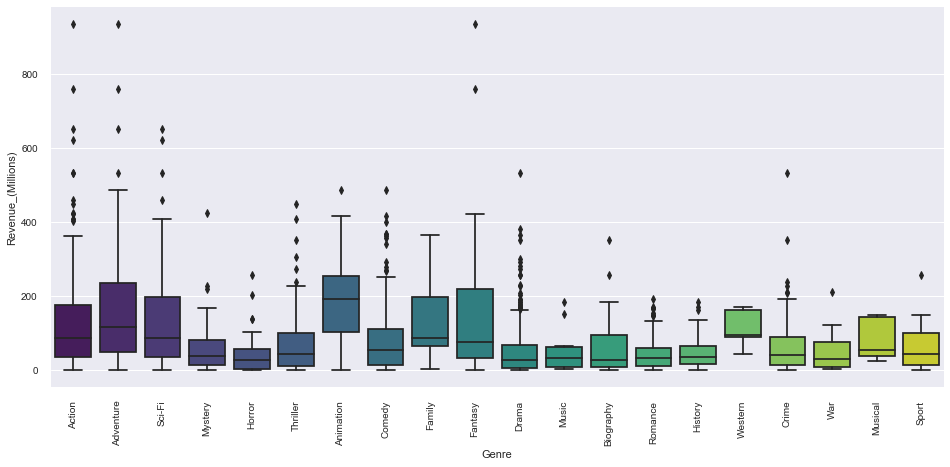

In [53]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df_movie_genres, x='Genre', y='Revenue_(Millions)', palette='viridis', width=0.8)
plt.xticks(rotation=90)

From the above chart we can see that Animation movies make more revenue in general. There are outliers in most of the Genres but outliers in Action, Adventure and Fantacy have generated way more money than any other Genre movies. <br>
So most of the animation movies generate good revenue but if you want to make a super hit movie, Action, Adventure and Fantacy are the Genres to choose from. <br><br>

<a id=section802></a>
### 8.2 Which year has more successful movies in terms of revenue?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

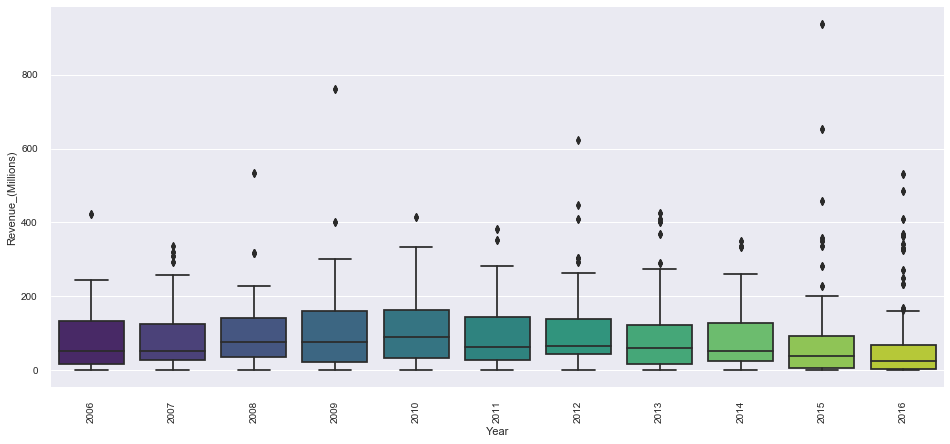

In [54]:
#Which year has more successful movies in terms of revenue?
plt.figure(figsize=(16, 7))
sns.boxplot(data=df_movie_genres, x='Year', y='Revenue_(Millions)', palette='viridis', width=0.8)
plt.xticks(rotation=90)

Though more movies are generated in the years 2015 & 2016, 2010 movies are doing well in generating revenue. There are outliers in each year but more so in years 2015 and 2016. May be because more movies are generated, the average revenue has been brought down in the years 2015&2016. Looking at the graph we can say **less is more**<br>


<a id=section803></a>
### 8.3 What is the relation between Revenue and Rating?


(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Text xticklabel objects>)

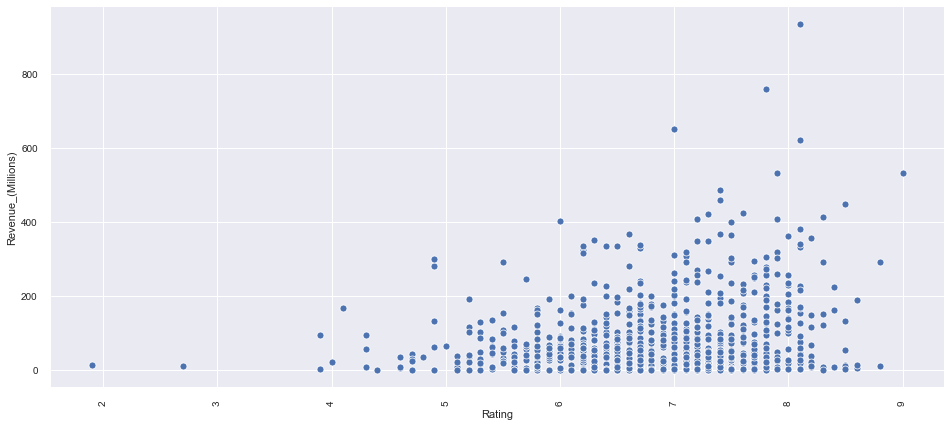

In [55]:
# Revenue vs Rating
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_movie, x='Rating', y='Revenue_(Millions)')
plt.xticks(rotation=90)

It is clear that most of the revenue generating movies have better rating but vice versa is not true. Just because the rating is high, does not mean that the movie will generate more revenue. <br>

<a id=section804></a>
### 8.4 What is the relation between Revenue and Metascore?

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

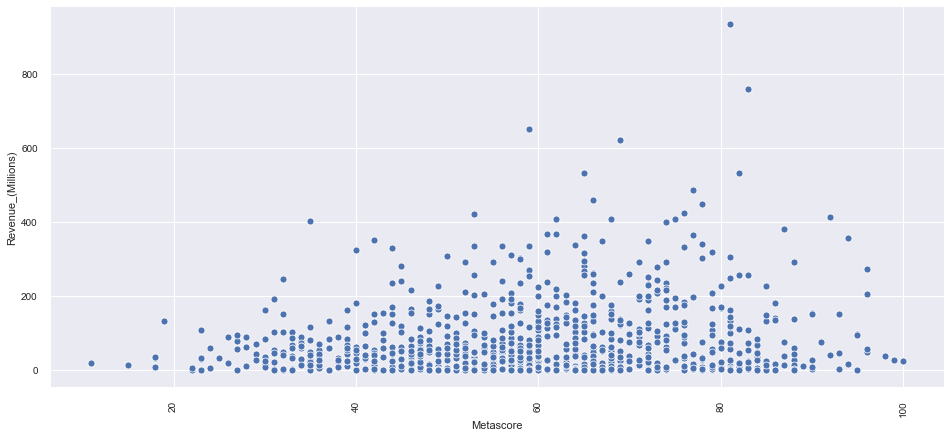

In [56]:
# Revenue vs Metascore
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_movie, x='Metascore', y='Revenue_(Millions)')
plt.xticks(rotation=90)

There is less corelation between revenue and Metascore when compared ot revenue and Rating. even average critic rated movies also have done relatively well in box office. All movies with high critic rating are not doing well in generating revenue.<br><br>

<a id=section805></a>
### 8.5 What is the relation between Revenue and Rating?

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000.]),
 <a list of 10 Text xticklabel objects>)

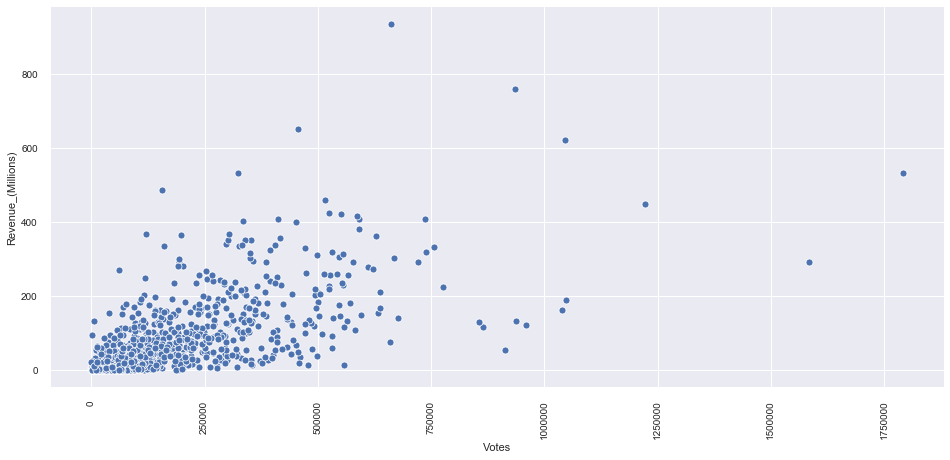

In [57]:
# Revenue vs Rating
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_movie, x='Votes', y='Revenue_(Millions)')
plt.xticks(rotation=90)

Most of the movies which have generated more revenue have garnered good votes. But looks like not many people bother to vote. 